In [1]:
#Digvijay Singh
#Assignment_3(CNN)
#3415

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.utils import to_categorical

2023-05-18 14:31:51.713604: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-18 14:31:51.788584: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-18 14:31:51.789335: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-18 14:31:52.621295: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
fashion_train_df = pd.read_csv('data/fashion_minst/fashion-mnist_train.csv', sep=',')
fashion_test_df = pd.read_csv('data/fashion_minst/fashion-mnist_test.csv', sep=',')

In [4]:
fashion_train_df.shape   # Shape of the dataset

(60000, 785)

In [5]:
fashion_train_df.columns   # Name of the columns of the DataSet.

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [6]:
print(set(fashion_train_df['label']))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


So we have 10 different lables. from 0 to 9. 

Now lets find out what is the min and max of values of in the other columns.

In [7]:
print([fashion_train_df.drop(labels='label', axis=1).min(axis=1).min(), 
      fashion_train_df.drop(labels='label', axis=1).max(axis=1).max()])

[0, 255]


So we have 0 to 255 which is the color values for grayscale. 0 being white and 255 being black.

Now lets check some of the rows in tabular format

In [8]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So evry other things of the test dataset are going to be the same as the train dataset except the shape.

In [9]:
fashion_test_df.shape

(10000, 785)

So here we have 10000 images instead of 60000 as in the train dataset.

Lets check first few rows.

In [10]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


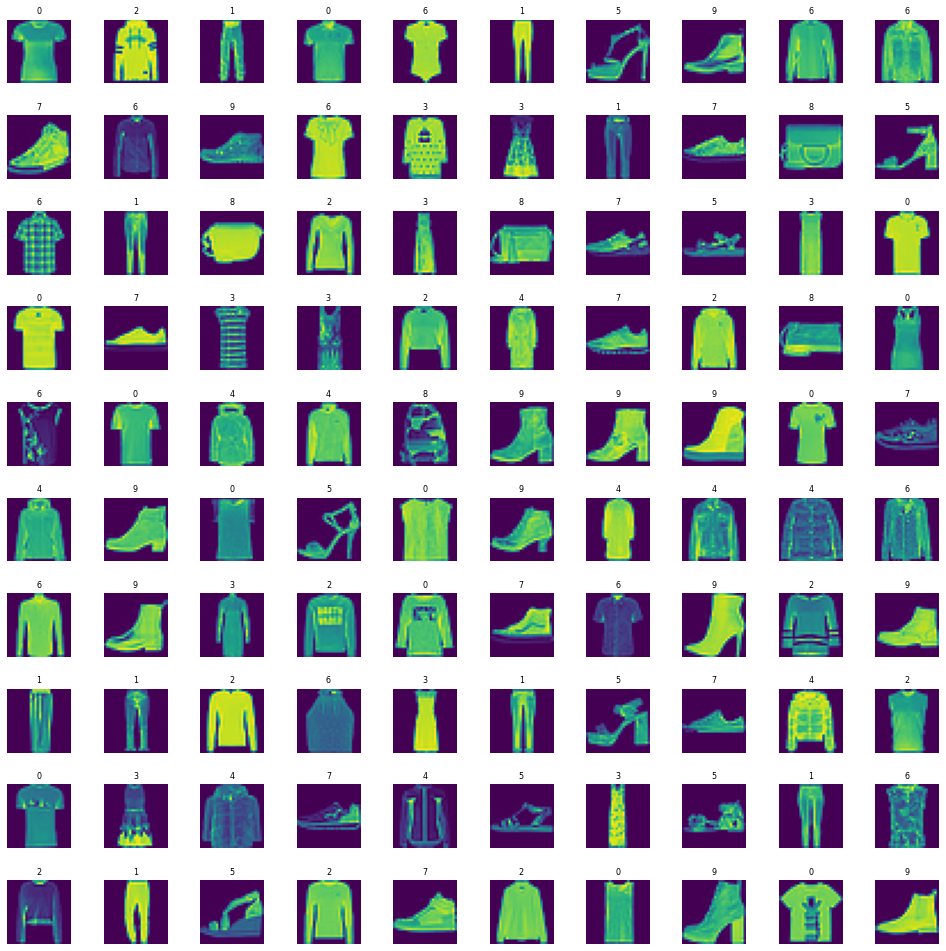

In [11]:
training = np.asarray(fashion_train_df, dtype='float32')

height = 10
width = 10

fig, axes = plt.subplots(nrows=width, ncols=height, figsize=(17,17))
axes = axes.ravel()  # this flattens the 15x15 matrix into 225
n_train = len(training)

for i in range(0, height*width):
    index = np.random.randint(0, n_train)
    axes[i].imshow(training[index, 1:].reshape(28,28))
    axes[i].set_title(int(training[index, 0]), fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.5)

In [12]:
training = np.asarray(fashion_train_df, dtype='float32')
X_train = training[:, 1:].reshape([-1,28,28,1])
X_train = X_train/255   
y_train = training[:, 0]

testing = np.asarray(fashion_test_df, dtype='float32')
X_test = testing[:, 1:].reshape([-1,28,28,1])
X_test = X_test/255    
y_test = testing[:, 0]

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=5)    # TODO : change the random state to 5

In [14]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1) (10000, 28, 28, 1)
(48000,) (12000,) (10000,)


In [15]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(rate=0.3))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=32, activation='relu'))
cnn_model.add(Dense(units=10, activation='sigmoid'))

**compile the model**

In [16]:
cnn_model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 32)                346144    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                        

/home/slp/anaconda3/lib/python3.9/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [17]:
from keras.utils.vis_utils import plot_model
plot_model(cnn_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


**Train the model**

In [18]:
cnn_model.fit(x=X_train, y=y_train, batch_size=512, epochs=100, validation_data=(X_val, y_val))

2023-05-18 14:32:11.817837: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


Epoch 1/100


2023-05-18 14:32:13.009202: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 88604672 exceeds 10% of free system memory.


 1/94 [..............................] - ETA: 1:50 - loss: 2.2946 - accuracy: 0.1211

2023-05-18 14:32:13.320946: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 88604672 exceeds 10% of free system memory.
2023-05-18 14:32:13.444374: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 88604672 exceeds 10% of free system memory.
2023-05-18 14:32:13.503316: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 88604672 exceeds 10% of free system memory.


94/94 [==============================] - 44s 457ms/step - loss: 0.7223 - accuracy: 0.7508 - val_loss: 0.4672 - val_accuracy: 0.8332
Epoch 2/100
94/94 [==============================] - 20s 202ms/step - loss: 0.4278 - accuracy: 0.8517 - val_loss: 0.4045 - val_accuracy: 0.8578
Epoch 3/100
94/94 [==============================] - 19s 205ms/step - loss: 0.3720 - accuracy: 0.8703 - val_loss: 0.3701 - val_accuracy: 0.8692
Epoch 4/100
94/94 [==============================] - 15s 162ms/step - loss: 0.3408 - accuracy: 0.8805 - val_loss: 0.3463 - val_accuracy: 0.8791
Epoch 5/100
94/94 [==============================] - 16s 167ms/step - loss: 0.3190 - accuracy: 0.8883 - val_loss: 0.3260 - val_accuracy: 0.8860
Epoch 6/100
94/94 [==============================] - 17s 179ms/step - loss: 0.3074 - accuracy: 0.8917 - val_loss: 0.3296 - val_accuracy: 0.8825
Epoch 7/100
94/94 [==============================] - 15s 160ms/step - loss: 0.2936 - accuracy: 0.8970 - val_loss: 0.3042 - val_accuracy: 0.8916
Epoc

In [19]:
eval_result = cnn_model.evaluate(X_test, y_test)
print("Accuracy :",(eval_result[1]))


313/313 [==============================] - 1s 3ms/step - loss: 0.3130 - accuracy: 0.9197
Accuracy : 0.919700026512146


In [20]:
y_pred = cnn_model.predict(x=X_test)

313/313 [==============================] - 1s 2ms/step


In [21]:
y_pred[2].argmax()


2

In [22]:
y_pred = [pred.argmax() for pred in y_pred]

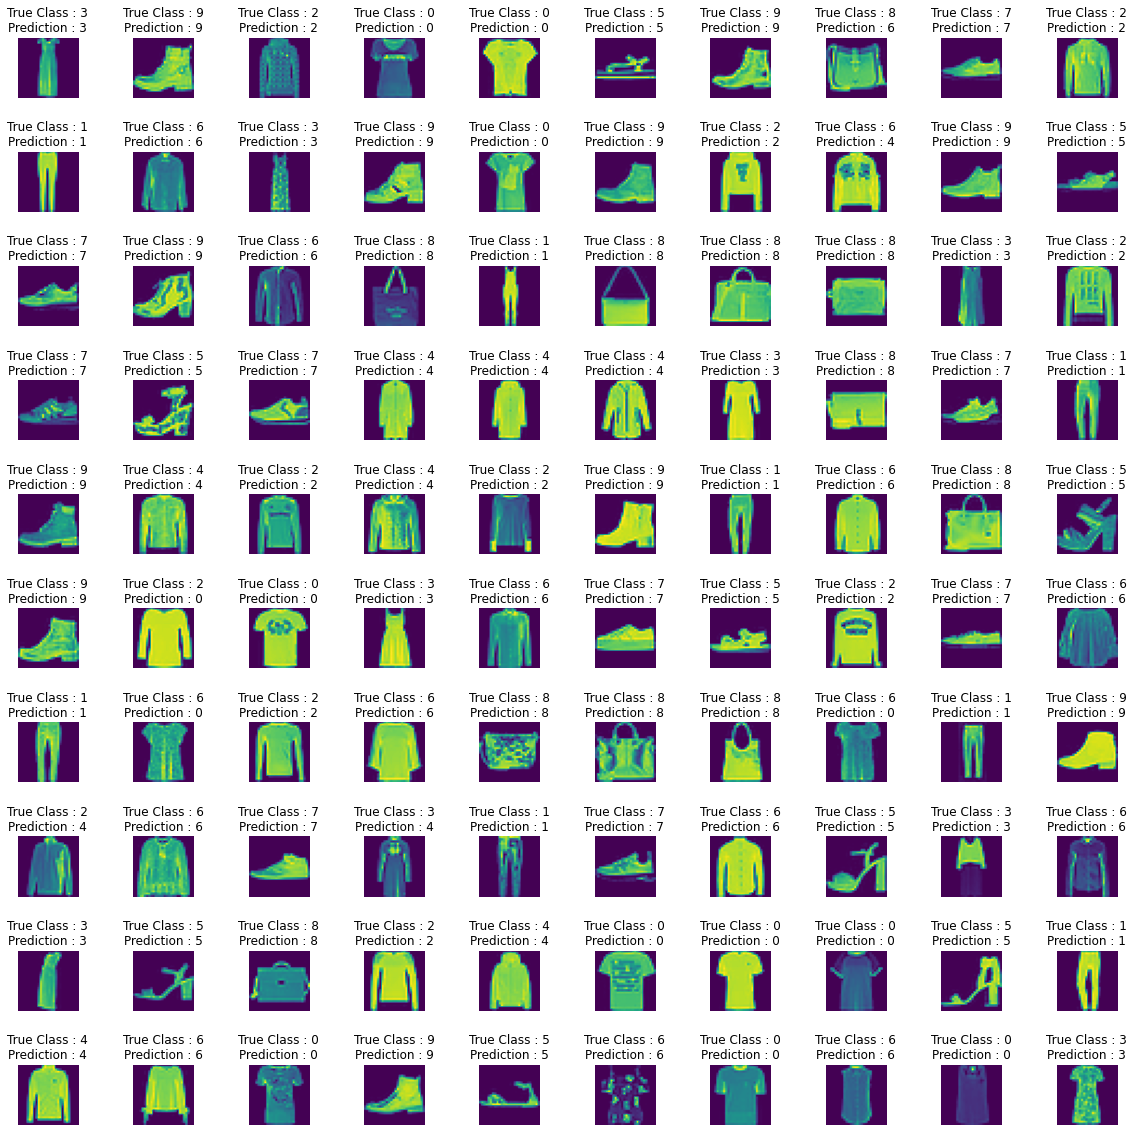

In [23]:
height = 10
width = 10

fig, axes = plt.subplots(nrows=width, ncols=height, figsize=(20,20))
axes = axes.ravel()
for i in range(0, height*width):
    index = np.random.randint(len(y_pred))
    axes[i].imshow(X_test[index].reshape((28,28)))
    axes[i].set_title("True Class : {:0.0f}\nPrediction : {:d}".format(y_test[index],y_pred[index]))
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.9, wspace=0.5)

**Plot Confusion Matrix**

<AxesSubplot:>

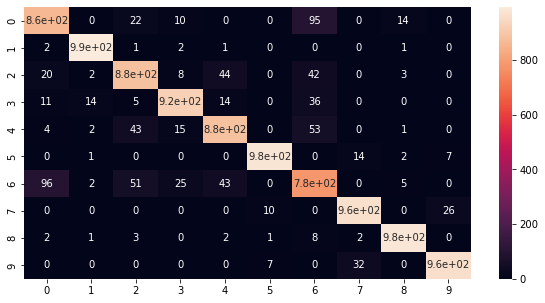

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sbn.heatmap(cm, annot=True)

**Classification Report**

In [25]:
num_classes = 10
class_names = ["class {}".format(i) for i in range(num_classes)]
cr = classification_report(y_test, y_pred, target_names=class_names)
print(cr)

              precision    recall  f1-score   support

     class 0       0.86      0.86      0.86      1000
     class 1       0.98      0.99      0.99      1000
     class 2       0.88      0.88      0.88      1000
     class 3       0.94      0.92      0.93      1000
     class 4       0.89      0.88      0.89      1000
     class 5       0.98      0.98      0.98      1000
     class 6       0.77      0.78      0.77      1000
     class 7       0.95      0.96      0.96      1000
     class 8       0.97      0.98      0.98      1000
     class 9       0.97      0.96      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

